In [23]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pylab as pl
import string
import seaborn as sns
warnings.simplefilter("ignore")
import textblob
from sklearn import model_selection,preprocessing, naive_bayes, metrics


In [29]:
reviews=pd.read_csv('D://Individual projects//amazon-fine-food-reviews//Reviews.csv')
reviews.loc[reviews['Score']<3,'Sentiment']='Negative'
reviews.loc[reviews['Score']==3,'Sentiment']='Neutral'
reviews.loc[reviews['Score']>3,'Sentiment']='Positive'
#positive=reviews.loc[reviews['Sentiment']=='Positive']
#negative=reviews.loc[reviews['Sentiment']=='Negative']
#neutral=reviews.loc[reviews['Sentiment']=='Neutral']
#p=positive.iloc[:,0:20000]
#n=negative.iloc[:,0:20000]
#ne=neutral.iloc[:,0:20000]

In [30]:
#frames=[p,n,ne]
#rev=pd.concat(frames)

In [36]:
rev=reviews.copy()


(568454, 11)

In [37]:
rev=rev.drop(['ProfileName','Summary'],axis=1)

In [38]:
#handling contractions
import re


contractions_dict = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how're": "how are",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have",
    "doin'": "doing",
    "goin'": "going",
    "nothin'": "nothing",
    "somethin'": "something",
}
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)
rev['Text']=rev['Text'].apply(lambda x:expand_contractions(x))

In [34]:
rev.shape

(568454, 11)

In [39]:
rev=rev.drop(['Id','ProductId','UserId','HelpfulnessNumerator','HelpfulnessDenominator','Time'],axis=1)

In [40]:
rev=rev.drop(['Score'],axis=1)

In [41]:
rev['char_count'] = rev['Text'].apply(len)
rev['word_count'] = rev['Text'].apply(lambda x: len(x.split()))
rev['word_density'] = rev['char_count'] / (rev['word_count']+1)
rev['punctuation_count'] = rev['Text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
rev['upper_case_word_count'] = rev['Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
rev['title_word_count'] = rev['Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
rev['upper_case_word_count'] = rev['Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [42]:
from sklearn import model_selection, preprocessing,naive_bayes
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

In [12]:
features=['Text','char_count','word_count','word_density','punctuation_count','upper_case_word_count','title_word_count']

In [43]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(rev['Text'], rev['Sentiment'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [44]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(rev['Text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [45]:
 #ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(rev['Text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

In [46]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions, valid_y)

In [47]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy)

NB, Count Vectors:  0.8327469496319856


In [48]:
# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)

NB, N-Gram Vectors:  0.8307837369998733


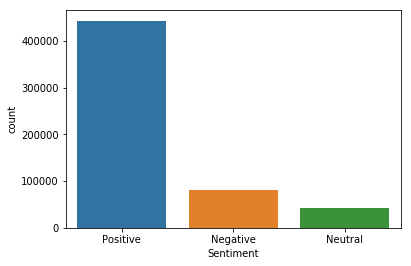

In [49]:
#EDA
sns.countplot(rev['Sentiment'])